Problem Statement:
Due to this fixed rent company is losing out on extra revenue that it can make when the demand 
is high or might increase sales by reducing the price when the demand is low. 
You need to design a system that predicts booking for the company

# Data Set Summary

datetime : date

season : season (1:winter, 2:spring, 3:summer, 4:fall)

yr : year (0: 2011, 1:2012)

mnth : month ( 1 to 12)

hr : hour (0 to 23)

holiday : weather day is holiday or not 

weekday : day of the week

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

weather :
 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 
temp : Normalized temperature in Celsius.

atemp: Normalized feeling temperature in Celsius. 

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered


# step1: 
loading dataset 
And extracting Year, Month, Hour, Weekday from Datetime 

remove datetime column

In [1]:
import pandas as pd
df=pd.read_csv('Downloads/bike-train.csv')
# df3=pd.read_csv('Downloads/bike-test.csv')
df['datetime']=pd.to_datetime(df['datetime'])
df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['hr']=pd.DatetimeIndex(df['datetime']).hour
df['weekday'] =df.datetime.dt.weekday
year={
    2011:'0',2012:'1'
}
df.drop(['datetime'],axis=1,inplace=True )
df=df[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','year','month','hr','weekday','count']]

df.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,hr,weekday,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,1,0,5,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,1,5,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,1,2,5,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,1,3,5,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,1,4,5,1


# step2:
Exploratory Data Analysis

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  year        10886 non-null  int64  
 11  month       10886 non-null  int64  
 12  hr          10886 non-null  int64  
 13  weekday     10886 non-null  int64  
 14  count       10886 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 1.2 MB


In [3]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,hr,weekday,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,2011.501929,6.521495,11.541613,3.013963,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,0.500019,3.444373,6.915838,2.004585,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,2011.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,2011.000000,4.000000,6.000000,1.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,2012.000000,7.000000,12.000000,3.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,2012.000000,10.000000,18.000000,5.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,2012.000000,12.000000,23.000000,6.000000,977.000000


# Type Casting

In [4]:
df['year']=df['year'].replace(year)
df['season']=df.season.astype('category')
df['year']=df.year.astype('category')
df['month']=df.month.astype('category')
df['holiday']=df.holiday.astype('category')
df['weekday']=df.weekday.astype('category')
df['workingday']=df.workingday.astype('category')
df['weather']=df.weather.astype('category')
df['hr']=df.hr.astype('category')


In [5]:
categorical_variable=['season','holiday','workingday','weather','year','month','weekday','hr']
numeric_variable=['temp','humidity','windspeed','casual','registered','count']

# Null Value analysis


no null value present in dataset

In [6]:
df.isnull().any()

season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
year          False
month         False
hr            False
weekday       False
count         False
dtype: bool

# Outlier detection

<AxesSubplot:>

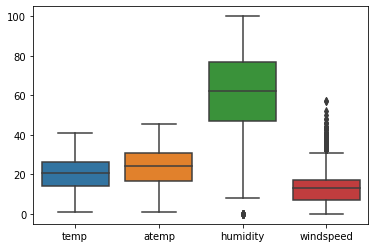

In [7]:
import seaborn as sns
sns.boxplot(data=df[['temp','atemp','humidity','windspeed']])

# Handling Outliers

Using clipping method

0 47.0 62.0 77.0 100
30.0
2.0 122.0


<AxesSubplot:>

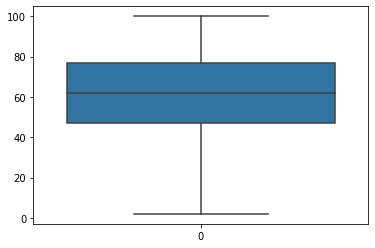

In [8]:
pmin=df.humidity.min()
q1=df.humidity.quantile(0.25)
q2=df.humidity.quantile(0.50)
q3=df.humidity.quantile(0.75)
pmax=df.humidity.max()
print(pmin,q1,q2,q3,pmax)
iqr=q3-q1
lc=q1-1.5*iqr

uc=q3+1.5*iqr
print(iqr)
print(lc,uc)
df.humidity.clip(lower=lc,inplace=True)
sns.boxplot(data=df.humidity)

0.0 7.0015 12.998 16.9979 56.9969
9.996400000000001
-7.993100000000002 31.992500000000003


<AxesSubplot:>

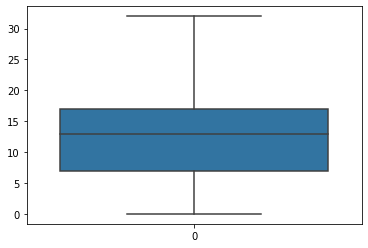

In [9]:

pmin=df.windspeed.min()
q1=df.windspeed.quantile(0.25)
q2=df.windspeed.quantile(0.50)
q3=df.windspeed.quantile(0.75)
pmax=df.windspeed.max()
print(pmin,q1,q2,q3,pmax)
iqr=q3-q1
lc=q1-1.5*iqr
uc=q3+1.5*iqr
print(iqr)
print(lc,uc)
df.windspeed.clip(upper=uc,inplace=True)
sns.boxplot(data=df.windspeed)

# Checking normality

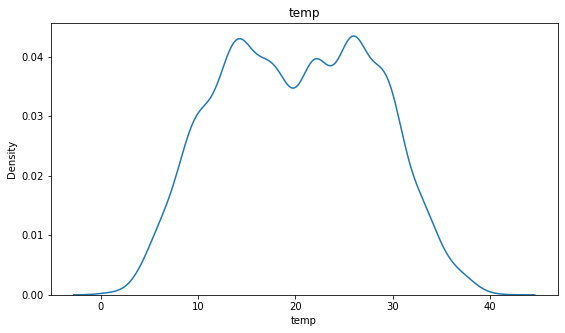

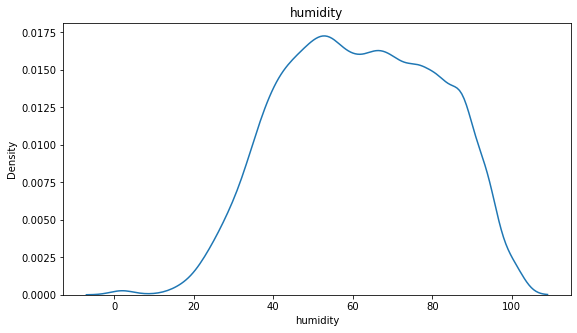

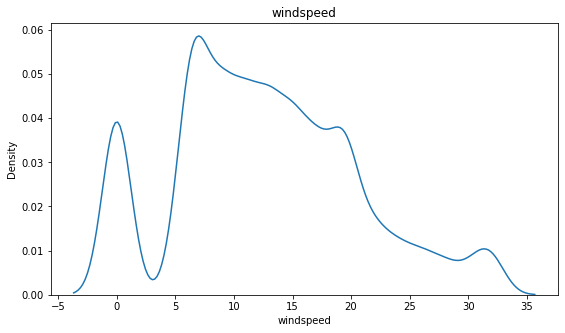

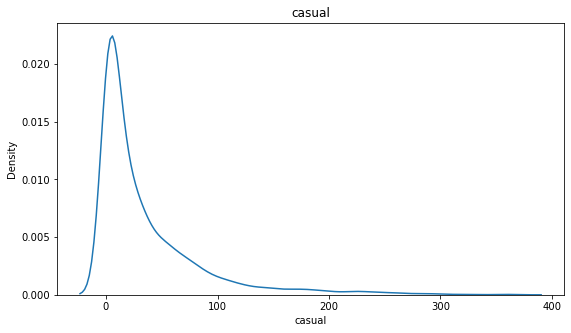

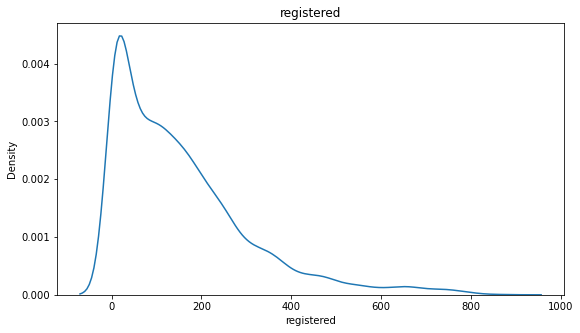

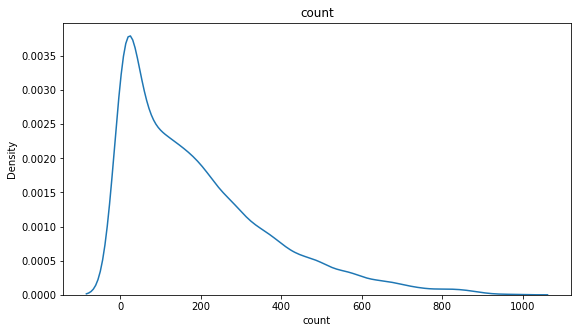

In [10]:
import matplotlib.pyplot as plt

for column in numeric_variable:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.kdeplot(df[column])
    plt.title(column)

Inference :

temperature (temp) looks like two overlapped normal distributions.
Humidity (hum) seems to follow a normal distribution, with a strong skewness towards the left 
.count seems to have exponential distribution 

# Bivariate analysis of categorical features with count

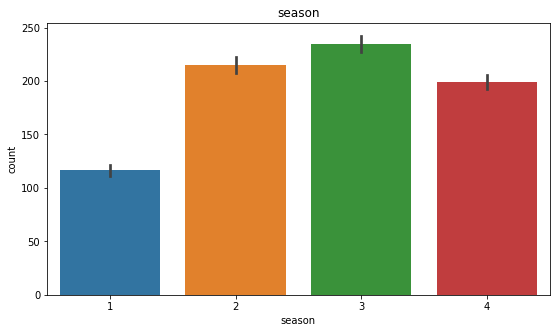

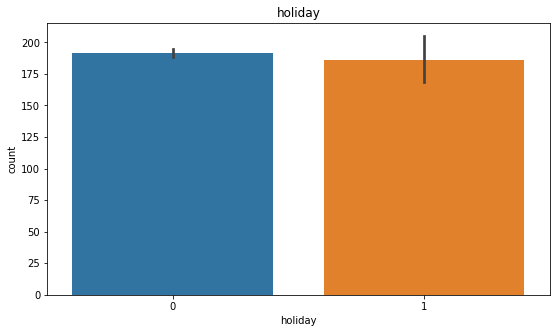

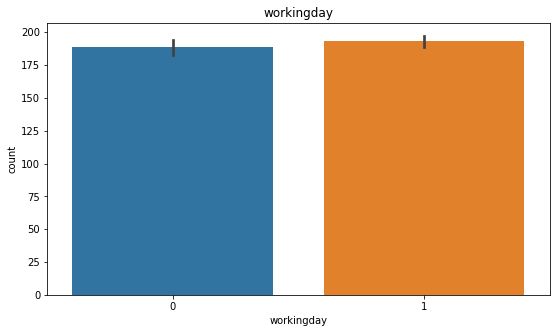

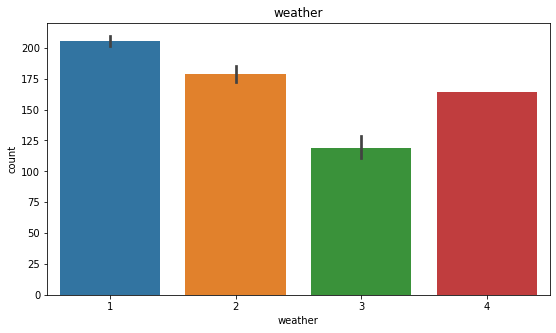

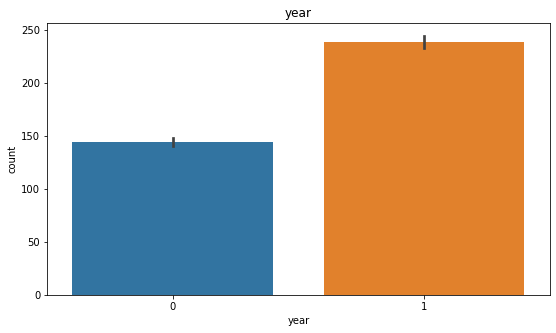

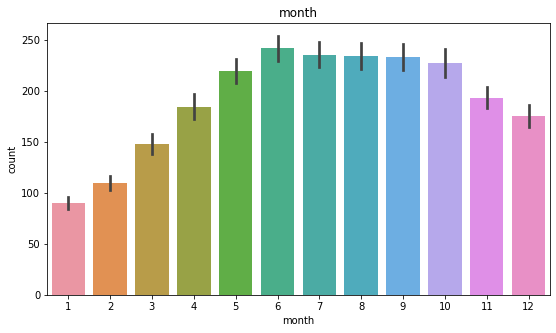

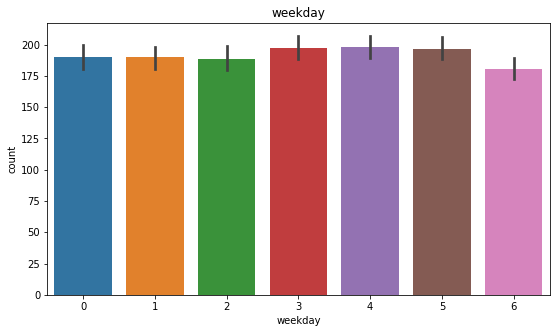

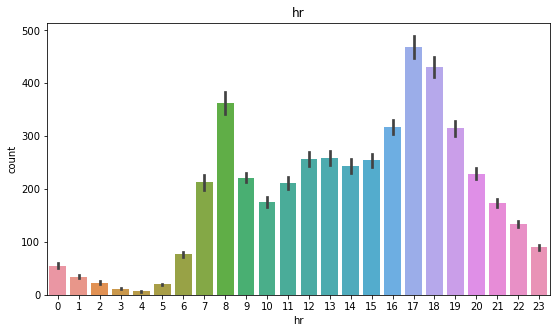

In [11]:

for i in categorical_variable:
    fig=plt.figure(figsize=(9,5))
    sns.barplot(x=i,y='count',data=df)
    plt.title(i)
    plt.show()

In [12]:
print('Number of holidays in 2011: ',len(df[(df['holiday']==1) & (df['year']=='0')]))
print('Number of holidays in 2012: ',len(df[(df['holiday']==1) & (df['year']=='1')]))


Number of holidays in 2011:  144
Number of holidays in 2012:  167


# Inference:

summer and fall season have high rental count.

count is high on non-holidays

when weather condition is 1 count is high and when weather condition is 3 count is low

The count in year 2012 is more than 2011

June has Highest count while january has lowest count

weekday's not showing much difference except sunday having low number of count 

count of rents in evening hours is higher than midnight hour

# point plot of categorical variable and count with hourly distribution

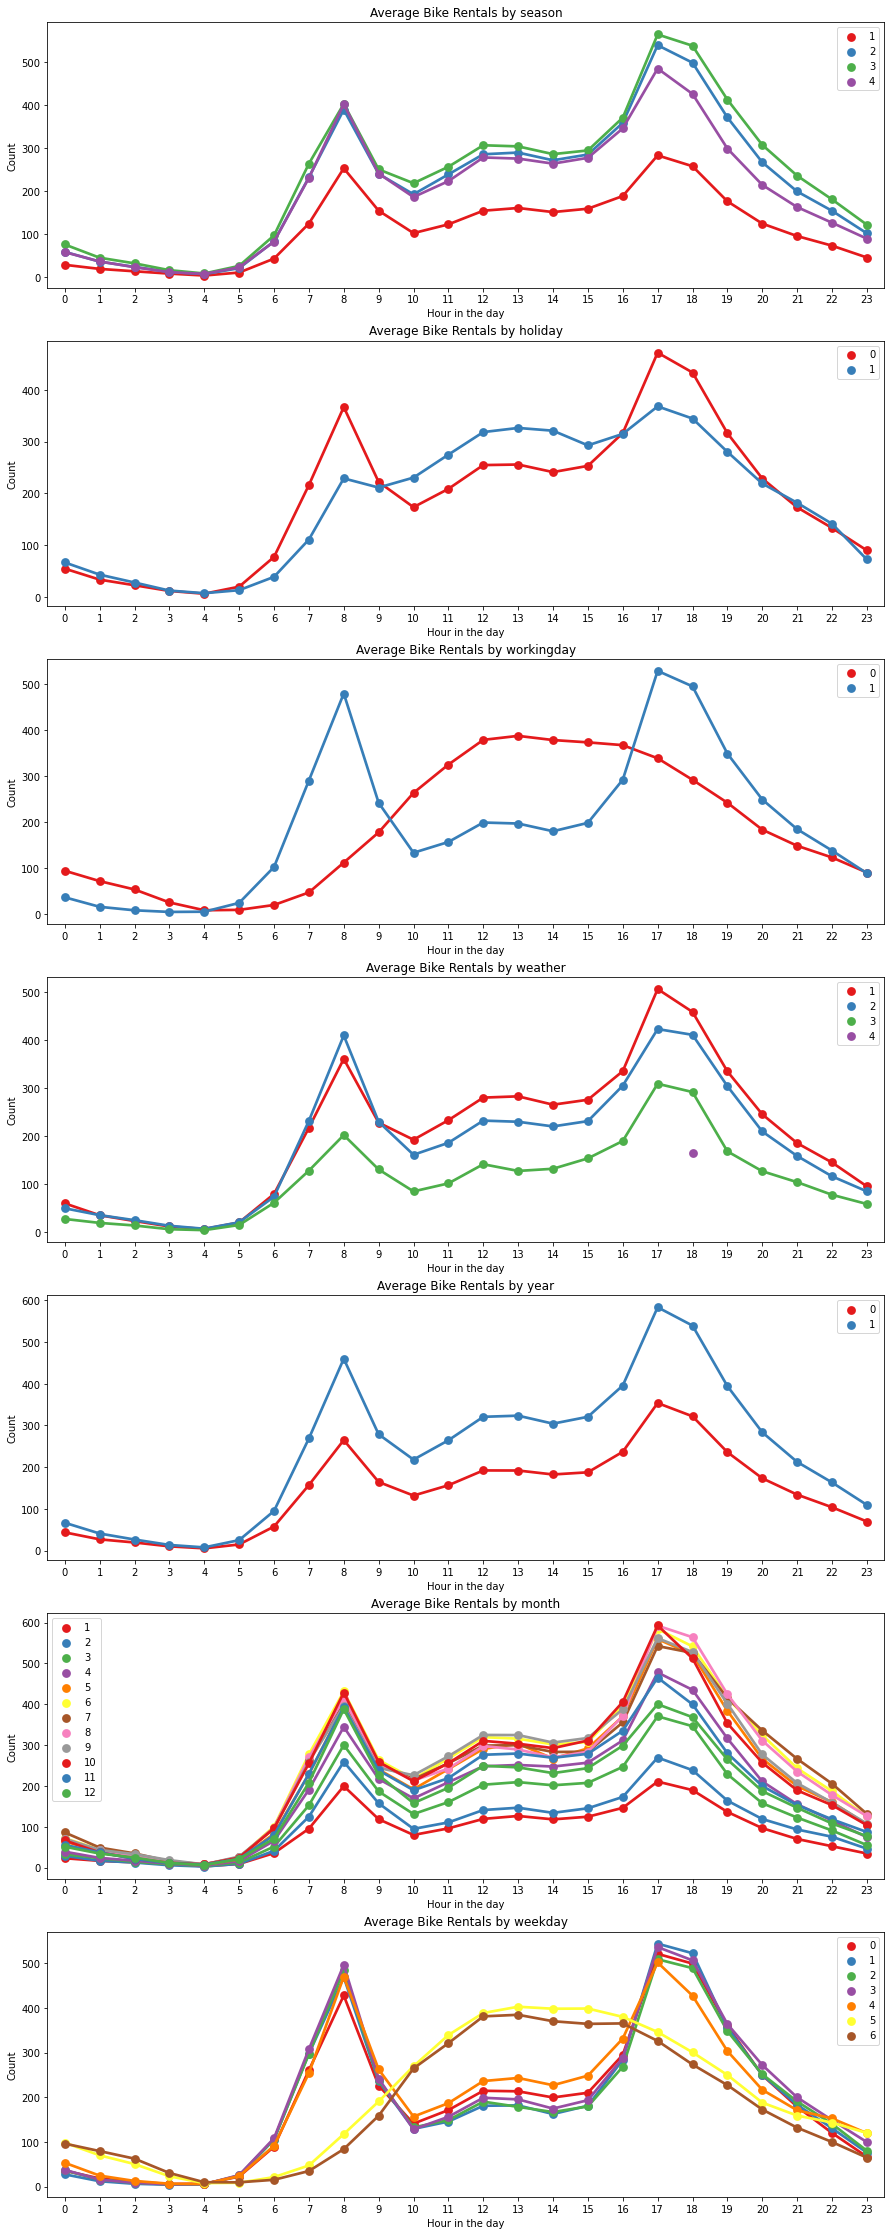

In [13]:
categorical_variable1=['season','holiday','workingday','weather','year','month','weekday']

f, axes = plt.subplots(nrows=7, ncols=1, figsize=(15, 40))

for i in range(len(categorical_variable1)):
    group_work_hour = pd.DataFrame(df.groupby([categorical_variable1[i], 'hr'])['count'].mean()).reset_index()
    sns.pointplot(data=group_work_hour, x='hr', y='count', hue=categorical_variable1[i], ax=axes[i], legend=True,palette="Set1")
    axes[i].legend()
    axes[i].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by '+categorical_variable1[i])
    
    
    


Inference:
    
Higher reservations can be seen at around 8am and 7pm (office hours) and close to 0 reservations very early in the morning


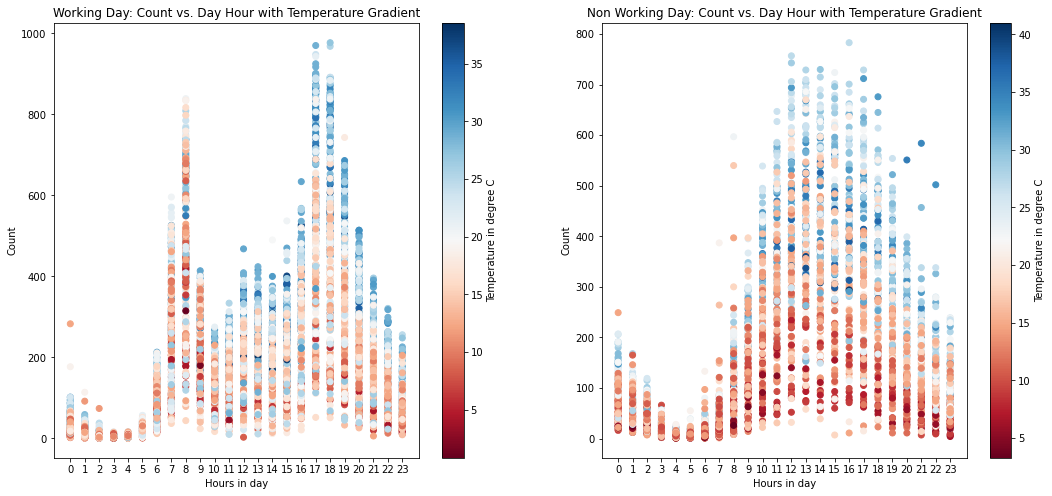

In [14]:
mydata_w = df[df.workingday==1]
mydata_nw = df[df.workingday==0]

fig = plt.figure(figsize=(18, 8))
# Working Day
axes = fig.add_subplot(1, 2, 1)
f = axes.scatter(mydata_w.hr, mydata_w['count'], c=mydata_w.temp, cmap = 'RdBu')
axes.set(xticks = range(24), xlabel='Hours in day', ylabel='Count', title='Working Day: Count vs. Day Hour with Temperature Gradient')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

# Non Working Day
axes = fig.add_subplot(1, 2, 2)
f = axes.scatter(mydata_nw.hr, mydata_nw['count'], c=mydata_nw.temp, cmap = 'RdBu')
axes.set(xticks = range(24), xlabel='Hours in day', ylabel='Count', title='Non Working Day: Count vs. Day Hour with Temperature Gradient')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

plt.show()

# Inference

count is high when temperature is moderate and count is low when temperature is high

# Correlation and feature selection

In [15]:
p1=df.corr()
p1

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.065107,-0.015521,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043673,-0.055305,0.462067,0.314635,0.389784
humidity,-0.065107,-0.043673,1.000000,-0.320164,-0.348561,-0.265814,-0.317772
windspeed,-0.015521,-0.055305,-0.320164,1.000000,0.095501,0.095128,0.105658
casual,0.467097,0.462067,-0.348561,0.095501,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265814,0.095128,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317772,0.105658,0.690414,0.970948,1.000000


<AxesSubplot:>

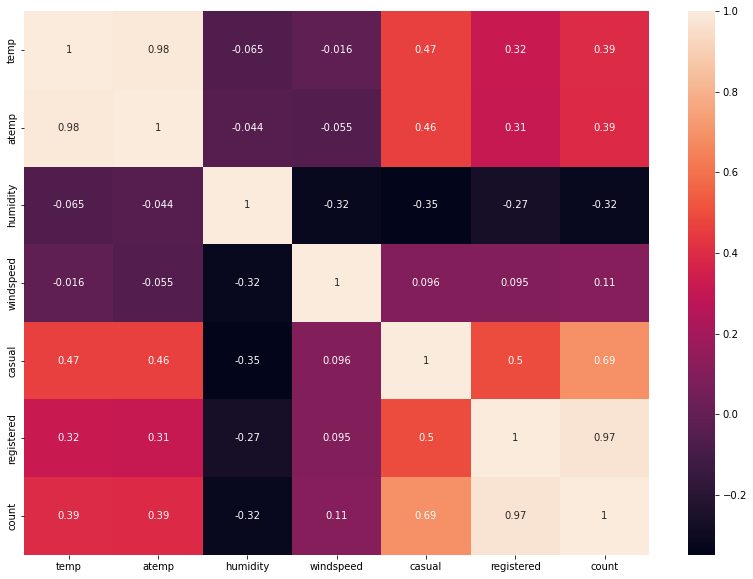

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
sns.heatmap(p1,annot=True)

temp and count are positively correlated while count and humidity are negatively correlated 



# Feature Selection

drop column temp as temp and atemp are highly correleated 

count is highly correlated with registered and casual as count=registered+casual,
so drop the column casual and registered

In [17]:
df.drop(['atemp','casual','registered'],axis=1,inplace=True)

# Encoding categorical variable

In [18]:
df=pd.get_dummies(df,columns=['season','workingday','weather','hr','month','weekday','holiday','year'])
df.columns

Index(['temp', 'humidity', 'windspeed', 'count', 'season_1', 'season_2',
       'season_3', 'season_4', 'workingday_0', 'workingday_1', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'hr_0', 'hr_1', 'hr_2', 'hr_3',
       'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11',
       'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19',
       'hr_20', 'hr_21', 'hr_22', 'hr_23', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'holiday_0', 'holiday_1', 'year_0', 'year_1'],
      dtype='object')

# Splitting  Dataset into train and test Dataframes

In [19]:
from sklearn.model_selection import train_test_split
dftrain,dftest=train_test_split(df,test_size=0.3)
dftrain

,temp,humidity,windspeed,count,season_1,season_2,season_3,season_4,workingday_0,workingday_1,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,holiday_0,holiday_1,year_0,year_1
9622,21.32,83.0,7.0015,428,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
9104,31.16,66.0,6.0032,503,0,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,1
7055,13.12,66.0,22.0028,624,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
3828,29.52,62.0,15.0013,404,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
4239,26.24,44.0,6.0032,451,0,0,0,1,1,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,25.42,38.0,16.9979,286,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
1547,15.58,94.0,6.0032,55,0,1,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
3529,27.06,65.0,8.9981,77,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0
4711,13.94,93.0,0.0000,219,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0


# Performing normalization on Trainig dataset using min max scaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

need_rescale=['temp','humidity','windspeed','count']
dftrain[need_rescale]=scaler.fit_transform(dftrain[need_rescale])

dftrain.describe()

,temp,humidity,windspeed,count,season_1,season_2,season_3,season_4,workingday_0,workingday_1,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,holiday_0,holiday_1,year_0,year_1
count,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,...,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000
mean,0.505959,0.610014,0.399746,0.196483,0.245669,0.253281,0.250919,0.250131,0.317454,0.682546,...,0.144357,0.145276,0.137795,0.140289,0.143045,0.145801,0.971391,0.028609,0.495407,0.504593
std,0.203223,0.196016,0.247483,0.186283,0.430512,0.434919,0.433570,0.433117,0.465516,0.465516,...,0.351474,0.352402,0.344708,0.347309,0.350141,0.352929,0.166716,0.166716,0.500012,0.500012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340426,0.448980,0.218848,0.043033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.510638,0.612245,0.406283,0.148566,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.659574,0.765306,0.531309,0.290984,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Storing target variable in y_train and reponse variable in x_train

In [21]:
x_train=dftrain.drop(['count'],axis=1)

y_train=dftrain['count']

# Performing normalization on testing dataset using min max scaler

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

need_rescale=['temp','humidity','windspeed','count']
dftest[need_rescale]=scaler.fit_transform(dftest[need_rescale])

dftest.describe()

,temp,humidity,windspeed,count,season_1,season_2,season_3,season_4,workingday_0,workingday_1,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,holiday_0,holiday_1,year_0,year_1
count,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,...,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000
mean,0.477942,0.613726,0.390855,0.198300,0.249235,0.245867,0.251378,0.253521,0.323025,0.676975,...,0.134415,0.135946,0.154011,0.140845,0.151255,0.143295,0.971525,0.028475,0.504287,0.495713
std,0.191467,0.196792,0.243763,0.189623,0.432636,0.430666,0.433872,0.435093,0.467704,0.467704,...,0.341150,0.342784,0.361015,0.347915,0.358352,0.350427,0.166352,0.166352,0.500058,0.500058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.326531,0.469388,0.218848,0.042239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.489796,0.612245,0.343874,0.148891,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.632653,0.775510,0.531309,0.294615,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Storing target variable in y_test and reponse variable in x_test

In [23]:
x_test=dftest.drop(['count'],axis=1)
y_test=dftest['count']


# Model Bulding: Multivariate regression

In [24]:
#linear
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
model=LinearRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_train)



# Model Accuracy 

In [25]:
print('root/-mean_squared_error : ', np.sqrt(mean_squared_error(y_train, predictions)))
print('mean_absolute_error : ', mean_absolute_error(y_train, predictions))
print('Accuracy :',model.score(x_train,y_train))
test_predictions = model.predict(x_test)
print('root/-mean_squared_error : ', np.sqrt(mean_squared_error(y_test, test_predictions)))
print('mean_absolute_error : ', mean_absolute_error(y_test, test_predictions))
print('r2 Score:',r2_score(y_test,test_predictions))


root/-mean_squared_error :  0.10222581928069552
mean_absolute_error :  0.07577801020737027
Accuracy : 0.698817171531382
root/-mean_squared_error :  0.10726477068119954
mean_absolute_error :  0.07827130024151115
r2 Score: 0.6799150142867572


# Regression plot

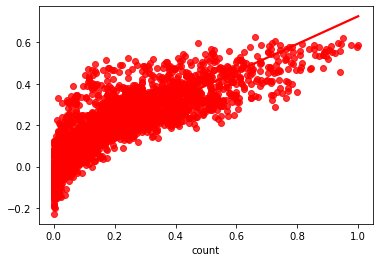

In [26]:
sns.regplot(x=y_test,y=test_predictions,ci=None,color ='red');

# Model Bulding : Polynomial regression

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
polynomial_features=PolynomialFeatures(degree=2)
x=polynomial_features.fit_transform(x_train)
model=LinearRegression()
model.fit(x,y_train)
predictions = model.predict(x)
y_test_predict = model.predict(polynomial_features.fit_transform(x_test))



# Model Accuracy

In [28]:
print('mean_squared_error : ', np.sqrt(mean_squared_error(y_train, predictions)))
print('mean_absolute_error : ', mean_absolute_error(y_train, predictions))
print(model.score(x,y_train))
print('mean_squared_error : ', np.sqrt(mean_squared_error(y_test, y_test_predict)))
print('mean_absolute_error : ', mean_absolute_error(y_test, y_test_predict))
# model.score(polynomial_features.fit_transform(x_test),y_test) 
r2_score(y_test,y_test_predict)

mean_squared_error :  0.046060902865435654
mean_absolute_error :  0.03169781726032725
0.938853176498019
mean_squared_error :  0.05469301602138635
mean_absolute_error :  0.036913291068537225


0.9167824679699784

# Regression Plot

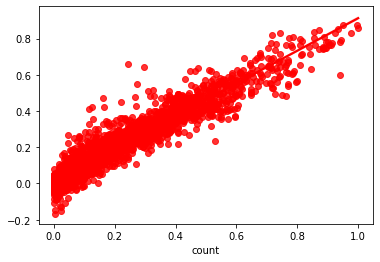

In [29]:
sns.regplot(x=y_test,y=y_test_predict,color ='red');

Polynomial regression perform better than multivarite linear regression